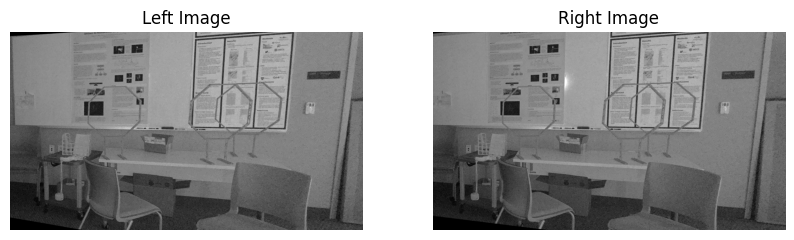

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the left and right images in grayscale
imgL = cv2.imread(r"/content/im0e0.png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread(r"/content/im1e0.png", cv2.IMREAD_GRAYSCALE)

# Display the stereo images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgL, cmap='gray')
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgR, cmap='gray')
plt.title('Right Image')
plt.axis('off')
plt.show()


# Stereo BM object to compute disparity
stereo = cv2.StereoBM_create(numDisparities=128, blockSize=15)

# Compute disparity map
disparity = stereo.compute(imgL, imgR).astype(np.float32)

# Replace non-positive disparities with NaN for better handling
disparity[disparity <= 0] = np.nan

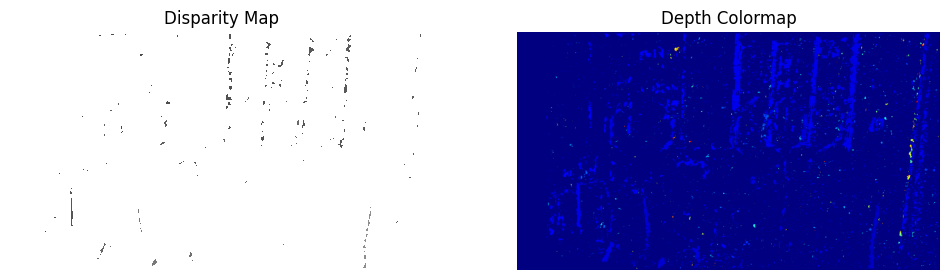

In [6]:

# Calculate depth from disparity
focal_length = 700
baseline = 0.5
depth_map = (focal_length * baseline) / disparity

# Remove NaN and infinite values
depth_map[np.isnan(depth_map)] = 0
depth_map[np.isinf(depth_map)] = 0

# Logarithmic scaling to enhance the range of values, particularly to bring up higher values
depth_map = np.log1p(depth_map)  # log1p ensures log(0+1) = 0 and scales up all other values

# Normalize and apply colormap
depth_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
depth_colormap = cv2.applyColorMap(np.uint8(depth_normalized), cv2.COLORMAP_JET)

# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))
plt.title('Depth Colormap')
plt.axis('off')
plt.show()